In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")


In [ ]:
# Check for missing values
missing = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()

# Convert categorical columns to category dtype
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [ ]:
missing

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Using dataframe df: check percentage of missing values

missing_values = df.isnull().sum().div(df.shape[0])
missing_values_percent = missing_values * 100
print(missing_values_percent)


id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [ ]:
# Drop rows with missing values since a little percentage is missing

df = df.dropna()


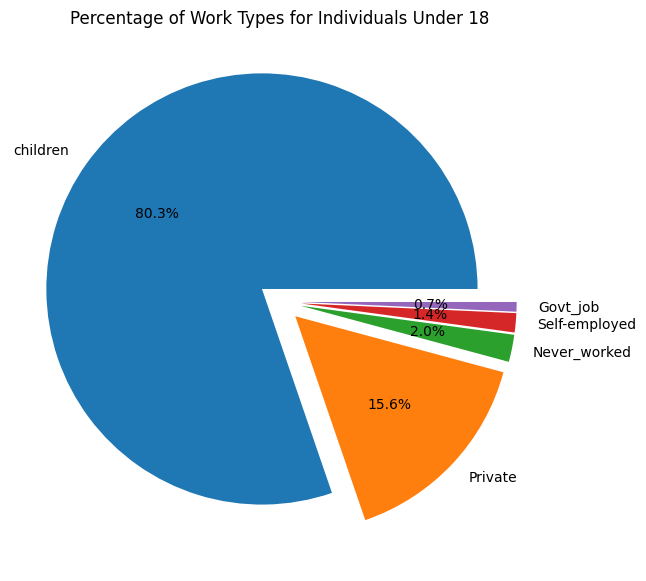

In [ ]:
# for rows that have the age column below 18 and Make a PIE CHART for the percentage of 'work_type'.

df_under18 = df[df['age'] < 18]
work_type_counts = df_under18['work_type'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct="%1.1f%%", explode=[0.1] * len(work_type_counts))
plt.title("Percentage of Work Types for Individuals Under 18")
plt.show()


In [ ]:
# Check unique values along with percentage that each unique value takes for every categorical column

for col in df.select_dtypes(include='category'):
    unique_values = df[col].value_counts()
    total_values = len(df[col])
    percentage = (unique_values / total_values) * 100
    print(f"Unique values for column '{col}':")
    for value, percent in zip(unique_values.index, percentage):
        print(f"- {value}: {percent:.2f}%")


Unique values for column 'gender':
- Female: 59.01%
- Male: 40.97%
- Other: 0.02%
Unique values for column 'ever_married':
- Yes: 65.27%
- No: 34.73%
Unique values for column 'work_type':
- Private: 57.26%
- Self-employed: 15.79%
- children: 13.67%
- Govt_job: 12.83%
- Never_worked: 0.45%
Unique values for column 'Residence_type':
- Urban: 50.72%
- Rural: 49.28%
Unique values for column 'smoking_status':
- never smoked: 37.73%
- Unknown: 30.21%
- formerly smoked: 17.05%
- smokes: 15.01%


In [ ]:
# Drop rows that hold the value "Other" in the "gender" column

df = df[df['gender'] != 'Other']


In [ ]:
# check non categorical columns and display description

df.select_dtypes(exclude='category').describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,37060.423594,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,20995.468407,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,18602.500000,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,37580.500000,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,55181.750000,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [ ]:
# convert the values in the age column to int type

df['age'] = df['age'].astype(int)


Strokes in children from 29 days to 18 years old are often associated with existing conditions, most commonly congenital heart disease and sickle cell disease. Other risk factors include infectious diseases, trauma to the head or neck, vascular problems and blood disorders.

https://www.stroke.org.uk/childhood-stroke/about-childhood-stroke#:~:text=Strokes%20in%20children%20from%2029,vascular%20problems%20and%20blood%20disorders.

In [ ]:
# check the rows that have the age column below 10 and check percentage of those that have heart disease value as 0.

young_df = df[df['age'] < 18]
heart_disease_zeros = young_df[young_df['heart_disease'] == 0]
percentage = (len(heart_disease_zeros) / len(young_df)) * 100
print(f"{percentage:.2f}% of young people (age < 18) have no heart disease.")

stroke_zeros = young_df[young_df['stroke'] == 0]
percentage_stroke = (len(stroke_zeros) / len(young_df)) * 100
print(f"{percentage_stroke:.2f}% of young people (age < 18) have no stroke.")

99.88% of young people (age < 18) have no heart disease.
99.88% of young people (age < 18) have no stroke.


Apparently some kids (below 18) also work according to this dataset

In [ ]:
# check the rows that have the age column below 18 and display the percentage that DON'T have 'work_type' value as children.

not_children_work_type = young_df[young_df['work_type'] != 'children']
percentage = (len(not_children_work_type) / len(young_df)) * 100
print(f"{percentage:.2f}% of young people (age < 18) don't have 'work_type' value as children.")


19.74% of young people (age < 18) don't have 'work_type' value as children.


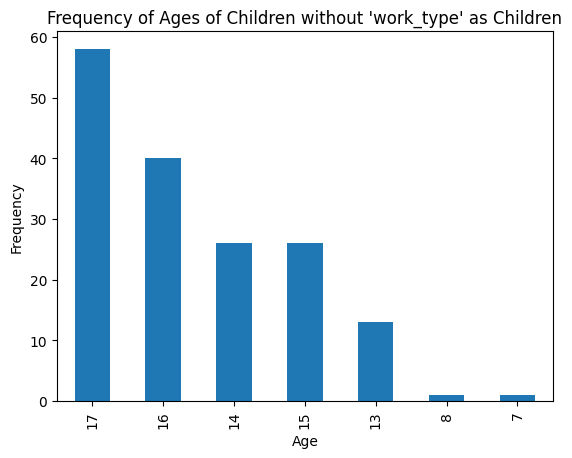

In [ ]:
# Show a chart that displays the frequencies of ages of children that don't have 'work_type' value as children

not_children_work_type['age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of Ages of Children without 'work_type' as Children")
plt.show()


In [ ]:
# check if the target column is skewed

df['stroke'].value_counts(normalize=True) * 100


stroke
0    95.741646
1     4.258354
Name: proportion, dtype: float64

In [ ]:
df.shape

(4908, 12)

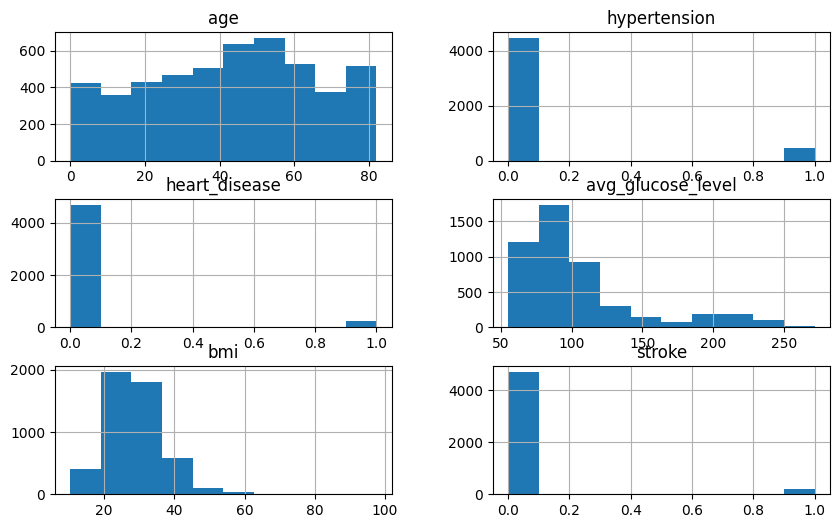

In [ ]:
# Distributions
df.drop('id', axis=1).hist(figsize=(10, 6))
plt.show()

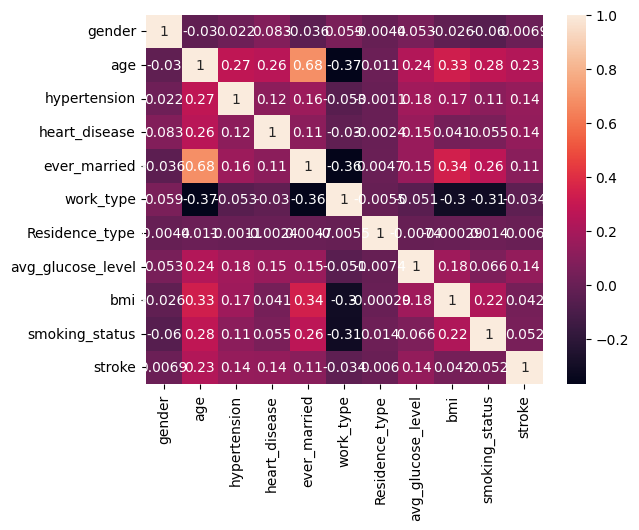

In [ ]:
# Correlations
sns.heatmap(df.drop('id', axis=1).corr(), annot=True)
plt.show()

In [ ]:
# percentage comparison of the gender of people who had stroke and those who didn't

stroke_yes = df[df['stroke'] == 1]
stroke_no = df[df['stroke'] == 0]

gender_stroke_yes = stroke_yes['gender'].value_counts(normalize=True) * 100
gender_stroke_no = stroke_no['gender'].value_counts(normalize=True) * 100

print("Percentage of gender for people who had stroke:")
print(gender_stroke_yes)

print("\nPercentage of gender for people who didn't have stroke:")
print(gender_stroke_no)

Percentage of gender for people who had stroke:
gender
0    57.416268
1    42.583732
Name: proportion, dtype: float64

Percentage of gender for people who didn't have stroke:
gender
0    59.09768
1    40.90232
Name: proportion, dtype: float64


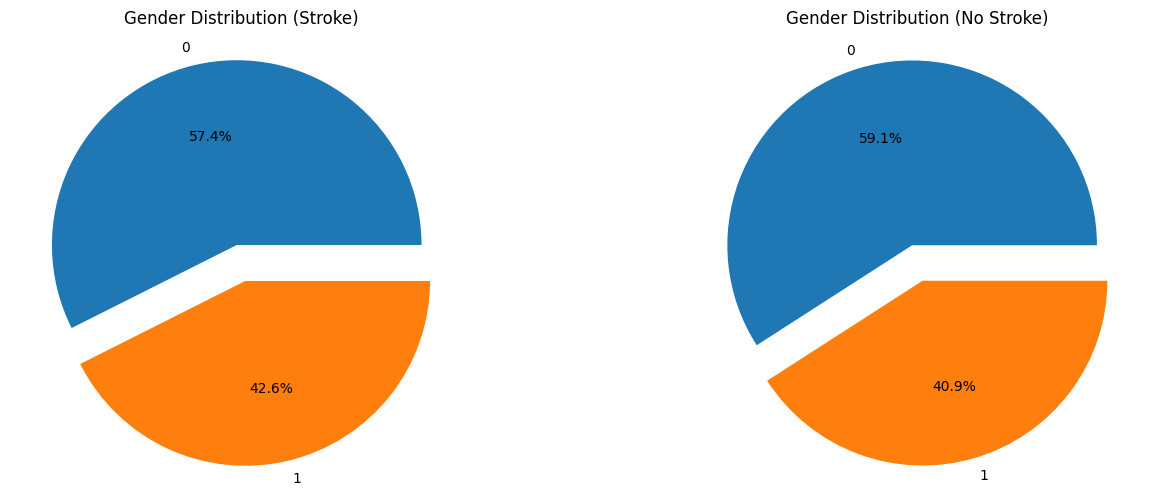

In [ ]:
# two side by pie charts that pops out and illustrates the comparison of the gender of people who had stroke and those who didn't

# Create two dataframes, one for each gender
df_stroke_gender = df[df['stroke'] == 1].groupby('gender')['gender'].count()
df_no_stroke_gender = df[df['stroke'] == 0].groupby('gender')['gender'].count()

# Create two pie charts
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(df_stroke_gender, labels=df_stroke_gender.index, autopct="%1.1f%%", explode=[0.1] * len(df_stroke_gender))
plt.title("Gender Distribution (Stroke)")

plt.subplot(1, 2, 2)
plt.pie(df_no_stroke_gender, labels=df_no_stroke_gender.index, autopct="%1.1f%%", explode=[0.1] * len(df_no_stroke_gender))
plt.title("Gender Distribution (No Stroke)")

plt.show()


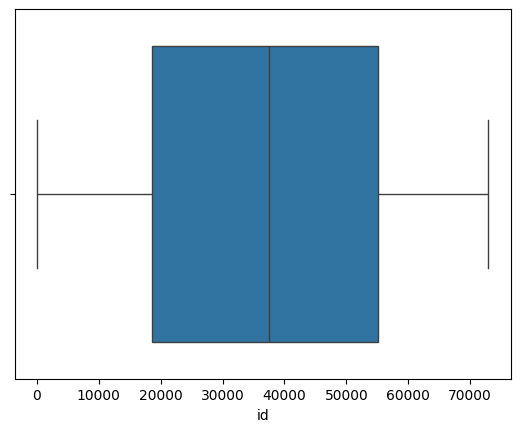

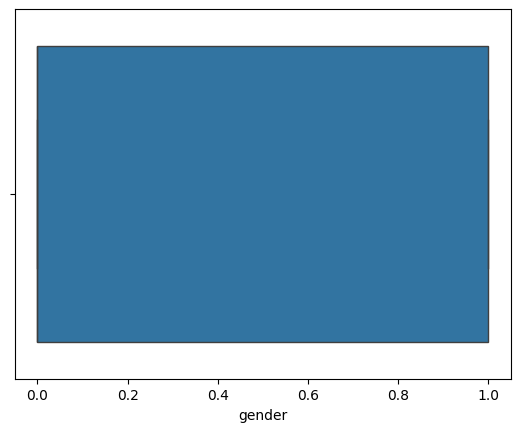

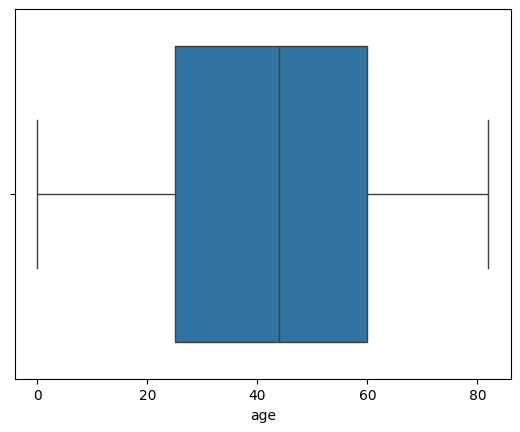

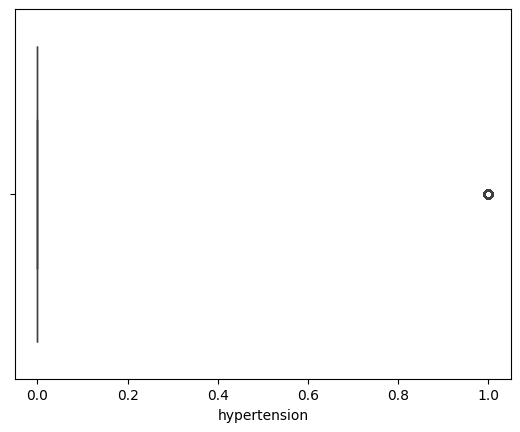

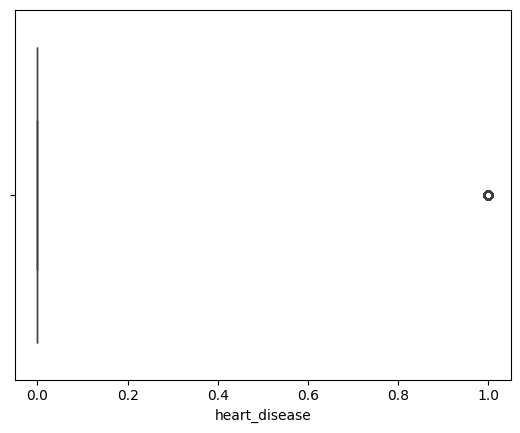

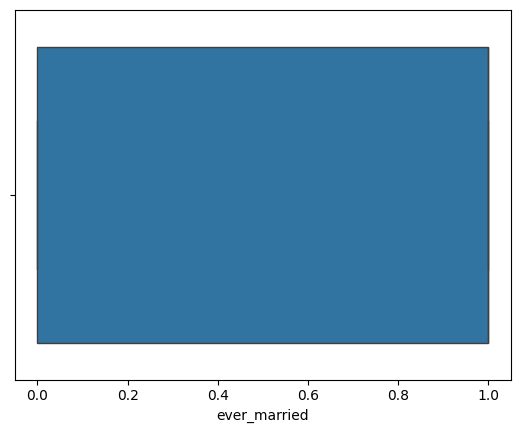

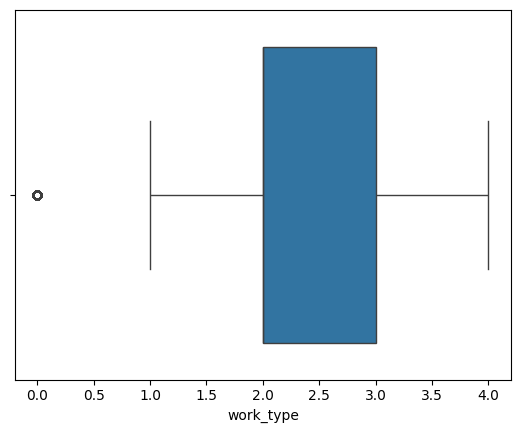

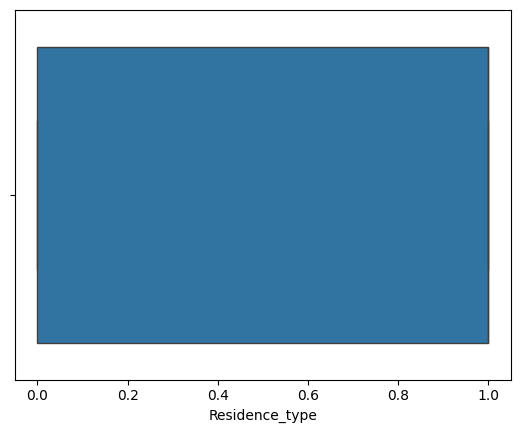

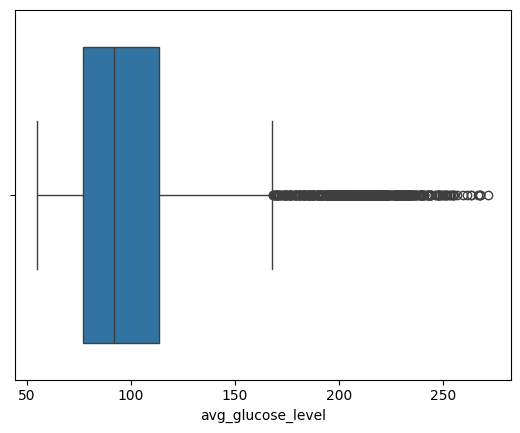

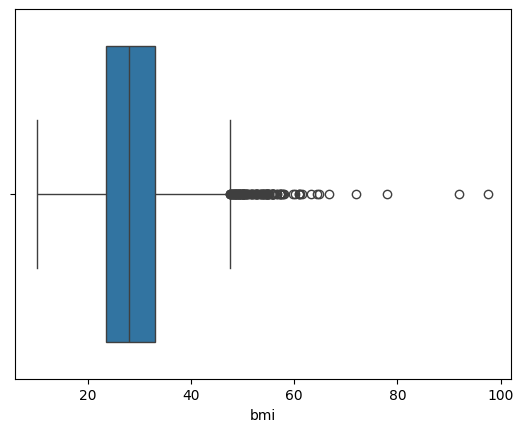

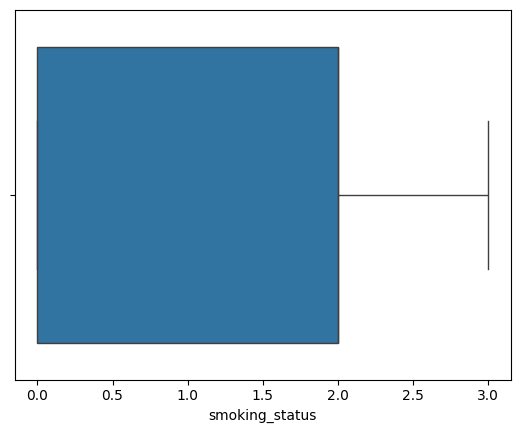

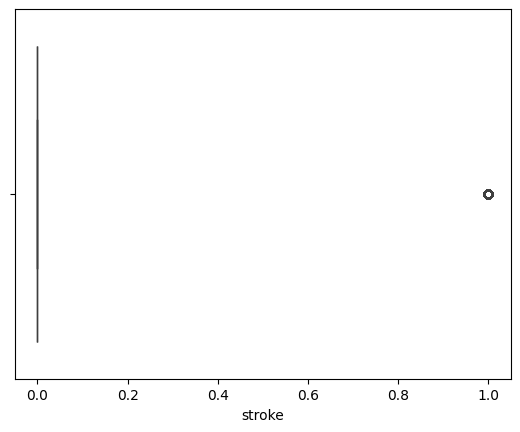

In [ ]:
# check for potential outliers in the data
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers in each numerical column
for col in df.select_dtypes(include=['number']):
  sns.boxplot(x=df[col])
  plt.show()


In [ ]:
# Calculate the percentage of outliers in the age, avg_glucose_level and bmi columns and interprete the results

def calculate_outliers(df, column):
  """
  Calculates the percentage of outliers in a given column of a dataframe.

  Args:
      df (pd.DataFrame): The dataframe containing the data.
      column (str): The name of the column to check for outliers.

  Returns:
      float: The percentage of outliers in the column.
  """

  # Calculate the interquartile range (IQR)
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1

  # Calculate the outlier boundaries
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Count the number of outliers
  outliers = df[((df[column] < lower_bound) | (df[column] > upper_bound))]
  outliers_count = len(outliers)

  # Calculate the percentage of outliers
  percentage = (outliers_count / len(df)) * 100

  return percentage

# Calculate the percentage of outliers in the age, avg_glucose_level and bmi columns
age_outliers = calculate_outliers(df, 'age')
avg_glucose_level_outliers = calculate_outliers(df, 'avg_glucose_level')
bmi_outliers = calculate_outliers(df, 'bmi')

# Print the results
print(f"Percentage of outliers in age: {age_outliers:.2f}%")
print(f"Percentage of outliers in avg_glucose_level: {avg_glucose_level_outliers:.2f}%")
print(f"Percentage of outliers in bmi: {bmi_outliers:.2f}%")

Percentage of outliers in age: 0.00%
Percentage of outliers in avg_glucose_level: 11.59%
Percentage of outliers in bmi: 2.24%


In [ ]:
# encode categorical values

df['gender'] = df['gender'].astype('category').cat.codes
df['ever_married'] = df['ever_married'].astype('category').cat.codes
df['work_type'] = df['work_type'].astype('category').cat.codes
df['Residence_type'] = df['Residence_type'].astype('category').cat.codes
df['smoking_status'] = df['smoking_status'].astype('category').cat.codes


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df.stroke.value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(['stroke',"id"], axis=1)
y = df['stroke']



# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split your data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:

# Train your model (example using RandomForestClassifier)
clf_re = RandomForestClassifier(random_state=42)
clf_re.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf_re.predict(X_test_resampled)

# Evaluate your model
print(classification_report(y_test_resampled, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       922
           1       0.95      0.97      0.96       958

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (example using RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate your model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


In [3]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.Explainer(clf_re)
shap_values_cat= explainer(X_test_resampled)

(1880, 10, 2)


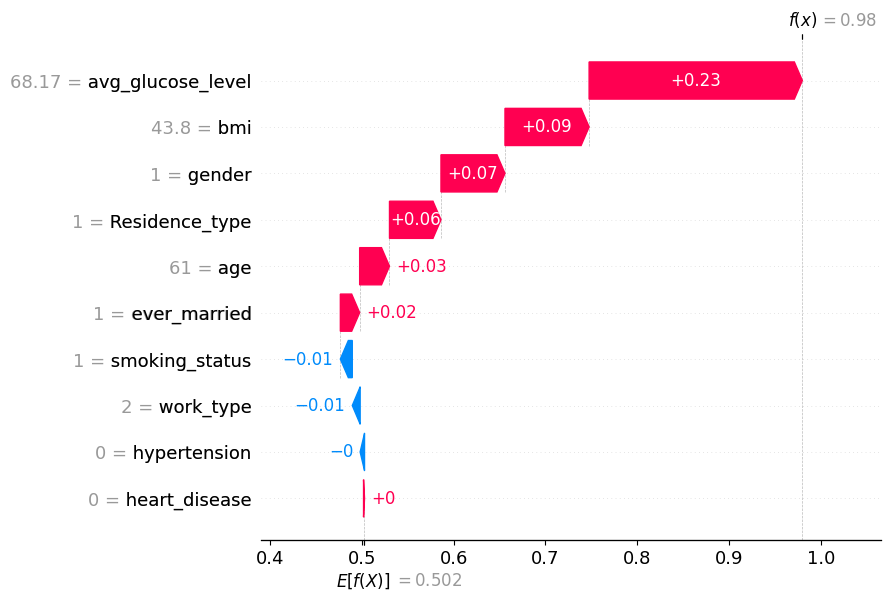

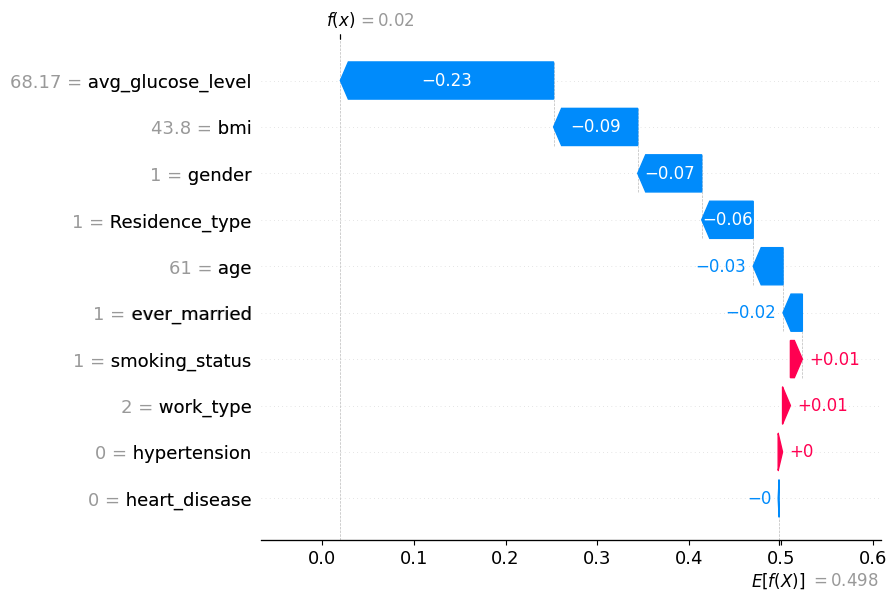

In [ ]:
# waterfall plot for class 0
shap.plots.waterfall(shap_values_cat[0,:,0])

# waterfall plot for class 1
shap.plots.waterfall(shap_values_cat[0,:,1])



In [ ]:
X_test_resampled.loc[[3742]]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3742,1,61,0,0,1,2,1,68.17,43.8,1


In [ ]:
choosen_instance = X_test_resampled.loc[[3742]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 0],choosen_instance)